# BRSET Dataset Analysis and Sampling for Bias Testing

## Objective

This notebook provides an in-depth analysis of the **Brazilian Multilabel Ophthalmological Dataset (BRSET)**, performs exploratory data analysis (EDA), and prepares balanced samples for bias testing in GPT-4 diagnostic abilities across different demographic groups.

We will:

- **Explore the dataset** to understand its structure and content.
- **Visualize** the distribution of age, sex, and various ophthalmological conditions.
- **Create balanced samples** based on demographic groups (age and sex) and the most frequent disease conditions.
- **Generate Venn diagrams and heatmaps** to illustrate condition overlaps within groups.
- **Prepare datasets** for two experiments and save them along with corresponding images.

## 1. Initial Setup and Data Overview

### 1.1 Import Libraries and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import numpy as np
import shutil

# Load the dataset
data_path = 'brset/labels1.csv'  # Path to the labels CSV file
images_folder = 'brset/images/'  # Folder containing images

# Read the labels CSV
labels_df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(labels_df.head())

First few rows of the dataset:


,image_id,patient_id,camera,patient_age,comorbidities,diabetes_time_y,insuline,patient_sex,exam_eye,diabetes,...,amd,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc,other,quality
0,img00001,1,Canon CR,48.0,diabetes1,12,yes,1,1,yes,...,0,0,0,0,0,0,0,1,0,Adequate
1,img00002,1,Canon CR,48.0,diabetes1,12,yes,1,2,yes,...,0,0,0,0,0,0,0,1,0,Adequate
2,img00003,2,Canon CR,18.0,diabetes1,7,yes,2,1,yes,...,0,0,0,0,0,0,0,0,0,Adequate
3,img00004,2,Canon CR,18.0,diabetes1,7,yes,2,2,yes,...,0,0,0,0,0,0,0,0,0,Adequate
4,img00005,3,Canon CR,22.0,diabetes1,11,yes,1,1,yes,...,0,0,0,0,0,0,0,0,0,Adequate


In [2]:
# Get list of image files in the images_folder
available_image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]

# Extract image IDs from filenames
available_image_ids = set([os.path.splitext(f)[0] for f in available_image_files])

print(f"Total images in labels_df after filtering: {len(labels_df)}")

Total images in labels_df after filtering: 16266


### 1.2. Initial Dataset Preview
In this section, we will explore the dataset to understand its structure, data types, and any missing values.

In [3]:
# Display basic information about the dataset to understand column types and missing values
print("\nDataset Info:")
labels_df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16266 entries, 0 to 16265
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   image_id                  16266 non-null  object 
 1   patient_id                16266 non-null  int64  
 2   camera                    16266 non-null  object 
 3   patient_age               10821 non-null  float64
 4   comorbidities             8030 non-null   object 
 5   diabetes_time_y           1910 non-null   object 
 6   insuline                  1714 non-null   object 
 7   patient_sex               16266 non-null  int64  
 8   exam_eye                  16266 non-null  int64  
 9   diabetes                  16266 non-null  object 
 10  nationality               16266 non-null  object 
 11  optic_disc                16266 non-null  object 
 12  vessels                   16266 non-null  int64  
 13  macula                    16266 non-null  int6

In [4]:
# Display summary statistics of the dataset to understand the distribution of numerical columns
labels_df.describe()

,patient_id,patient_age,patient_sex,exam_eye,vessels,macula,DR_SDRG,DR_ICDR,focus,iluminaton,...,nevus,amd,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc,other
count,16266.000000,10821.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,...,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000
mean,4275.474302,57.655947,1.617976,1.498647,1.049613,1.288024,0.180868,0.180007,1.033321,1.005164,...,0.008238,0.022501,0.006332,0.017398,0.172569,0.005902,0.000430,0.016476,0.196852,0.046600
std,2463.584452,18.260156,0.485897,0.500014,0.217150,0.452856,0.750198,0.739261,0.179479,0.071678,...,0.090392,0.148310,0.079325,0.130754,0.377885,0.076599,0.020741,0.127301,0.397632,0.210788
min,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2158.250000,47.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4270.000000,61.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6420.750000,71.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8524.000000,97.000000,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Identify unique values and types for each column to better understand the dataset content
print("\nSummary of Unique Values in Each Column:")
for col in labels_df.columns:
    unique_vals = labels_df[col].unique()
    num_unique_vals = len(unique_vals)
    print(f"{col}: {num_unique_vals} unique values, Sample values: {unique_vals[:5]}")


Summary of Unique Values in Each Column:
image_id: 16266 unique values, Sample values: ['img00001' 'img00002' 'img00003' 'img00004' 'img00005']
patient_id: 8524 unique values, Sample values: [1 2 3 4 5]
camera: 2 unique values, Sample values: ['Canon CR' 'NIKON NF5050']
patient_age: 93 unique values, Sample values: [48. 18. 22. 23. 14.]
comorbidities: 214 unique values, Sample values: ['diabetes1' 'diabetes1, SAH' 'diabetes, SAH' 'dyslipidemia' 'SAH']
diabetes_time_y: 56 unique values, Sample values: ['12' '7' '11' '1' '20']
insuline: 3 unique values, Sample values: ['yes' 'no' nan]
patient_sex: 2 unique values, Sample values: [1 2]
exam_eye: 2 unique values, Sample values: [1 2]
diabetes: 2 unique values, Sample values: ['yes' 'no']
nationality: 1 unique values, Sample values: ['Brazil']
optic_disc: 3 unique values, Sample values: ['1' '2' 'bv']
vessels: 2 unique values, Sample values: [1 2]
macula: 2 unique values, Sample values: [1 2]
DR_SDRG: 5 unique values, Sample values: [0 1 3

### 1.3 Key Columns in the BRSET Dataset

From our exploration, we can categorize the main types of columns. More information about the dataset can be found in the [BRSET Dataset Description](https://physionet.org/content/brazilian-ophthalmological/1.0.0/) on PhysioNet.

- **Identifiers**: 
  - `image_id` and `patient_id`: Unique identifiers for each image and patient.
  
- **Camera Information**:
  - `camera`: Type of camera used (e.g., Canon CR or Nikon NF5050).
  
- **Demographics and Health Information**:
  - `patient_age`, `patient_sex`, `comorbidities`, `diabetes_time_y`, `insuline`: Patient demographics and health details.
  - `exam_eye`: Side of the eye examined.
  
- **Diagnostic Labels**:
  - `diabetes`, `nationality`, `optic_disc`, `vessels`, `macula`: Various diagnostic labels and anatomical evaluations.
  - `DR_SDRG` and `DR_ICDR`: Diabetic retinopathy classifications per two grading systems.

- **Quality Control Parameters**:
  - `focus`, `illumination`, `image_field`, `artifacts`: Quality parameters for each image.

- **Disease Conditions (Classification)**:
  - Columns indicating the presence or absence of several conditions, including `diabetic_retinopathy`, `macular_edema`, `scar`, `nevus`, `amd`, `vascular_occlusion`, `hypertensive_retinopathy`, `drusens`, `hemorrhage`, `retinal_detachment`, `myopic_fundus`, `increased_cup_disc`, and `other`.

- **Image Quality**:
  - `quality`: Overall quality of the image, labeled as "Adequate" or otherwise.

## 2. Exploratory Data Analysis (EDA)

We will now perform an EDA to understand the distribution of key demographic and diagnostic features.

### 2.1 Age and Sex Distribution

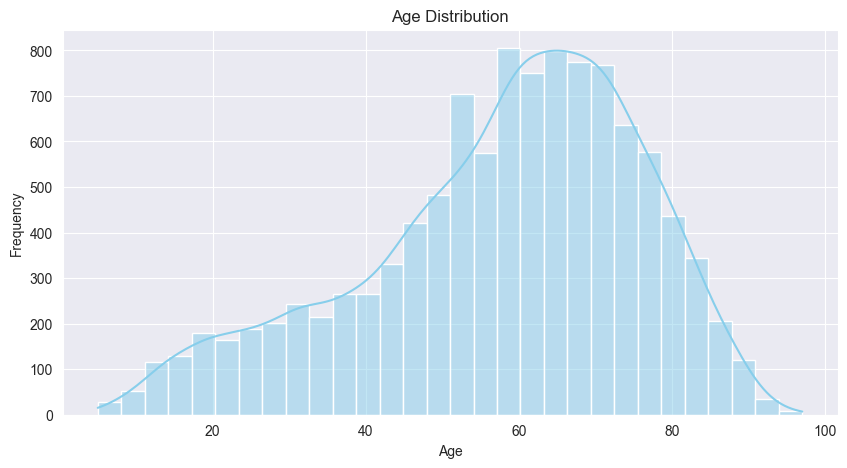

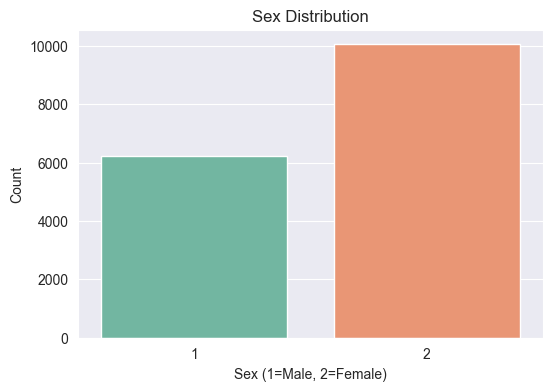

In [6]:
# Plot the age distribution
plt.figure(figsize=(10, 5))
sns.histplot(labels_df['patient_age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the sex distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='patient_sex', data=labels_df, hue='patient_sex', palette='Set2', legend=False)
plt.title('Sex Distribution')
plt.xlabel('Sex (1=Male, 2=Female)')
plt.ylabel('Count')
plt.show()

### 2.2 Condition Prevalence Analysis

In this section, we identify the most common conditions and analyze their prevalence in the dataset.

In [7]:
# Identify the most common conditions
disease_labels = [
    'diabetic_retinopathy', 'macular_edema', 'scar', 'nevus', 'amd',
    'vascular_occlusion', 'hypertensive_retinopathy', 'drusens', 'hemorrhage',
    'retinal_detachment', 'myopic_fundus', 'increased_cup_disc'
]

# Count the occurrences of each condition
condition_counts = labels_df[disease_labels].sum().sort_values(ascending=False)
print("Condition Counts in the Dataset:")
print(condition_counts)

Condition Counts in the Dataset:
increased_cup_disc          3202
drusens                     2807
diabetic_retinopathy        1046
macular_edema                402
amd                          366
scar                         290
hypertensive_retinopathy     283
myopic_fundus                268
nevus                        134
vascular_occlusion           103
hemorrhage                    96
retinal_detachment             7
dtype: int64


In [8]:
# Select the 4 most common conditions
most_common_conditions = condition_counts.index[:4].tolist()
print("\nMost Common Conditions Selected for Sampling:")
print(most_common_conditions)


Most Common Conditions Selected for Sampling:
['increased_cup_disc', 'drusens', 'diabetic_retinopathy', 'macular_edema']


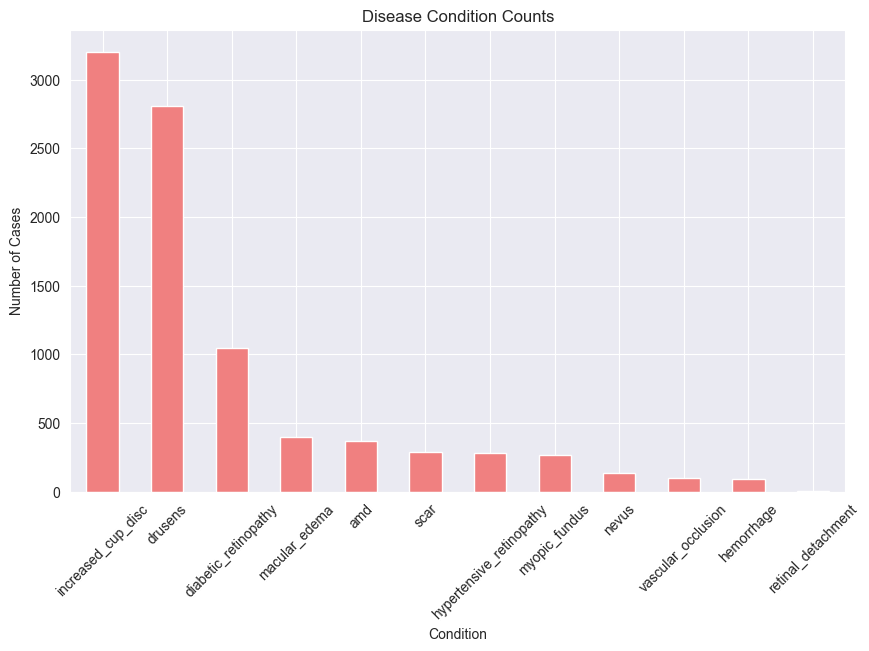

In [9]:
# Plot the most common conditions for reference
plt.figure(figsize=(10, 6))
condition_counts.plot(kind='bar', color='lightcoral')
plt.title('Disease Condition Counts')
plt.xlabel('Condition')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

### 2.3 Image Quality Distribution

We filter the dataset to include only images labeled as "Adequate" to ensure data quality.

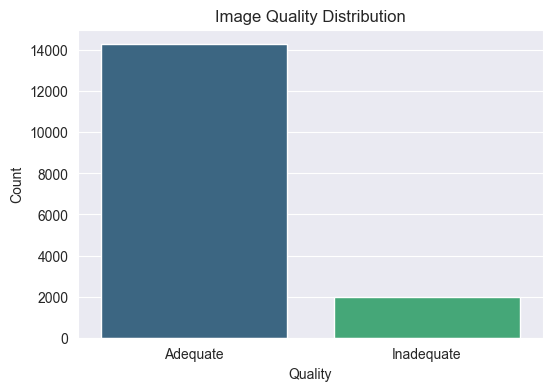

In [10]:
# Plot the image quality distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=labels_df, hue='quality', palette='viridis', legend=False)
plt.title('Image Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

## 3. Displaying a Sample Image with Labels
To understand the format and quality of the images, let's display a sample image and review its labels.

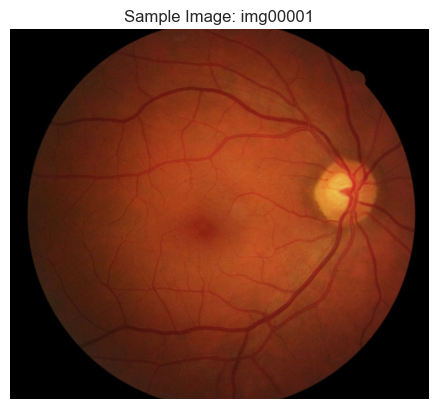

Labels for sample image img00001:


,image_id,patient_id,camera,patient_age,comorbidities,diabetes_time_y,insuline,patient_sex,exam_eye,diabetes,...,amd,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc,other,quality
0,img00001,1,Canon CR,48.0,diabetes1,12,yes,1,1,yes,...,0,0,0,0,0,0,0,1,0,Adequate


In [11]:
# Select a sample image by image_id and display it
sample_image_id = labels_df['image_id'].iloc[0]
sample_image_path = os.path.join(images_folder, sample_image_id + '.jpg')

# Load and display the image
sample_image = Image.open(sample_image_path)
plt.imshow(sample_image)
plt.axis('off')
plt.title(f"Sample Image: {sample_image_id}")
plt.show()

# Display labels for the sample image
print(f"Labels for sample image {sample_image_id}:")
display(labels_df[labels_df['image_id'] == sample_image_id])

## 4. Grouping by Age and Sex for Balanced Sampling
To evaluate potential biases, we will create three age groups and sample evenly across both sexes within each age group.

### Age Grouping
We define age groups as:
- **Young**: <20 years
- **Middle-aged**: 20–60 years
- **Older**: >60 years

In [12]:
# Check for missing values in the patient_age column
missing_age_count = labels_df['patient_age'].isna().sum()
print(f"Number of missing values in patient_age: {missing_age_count}")

Number of missing values in patient_age: 5445


In [13]:
# Modify age groups to increase representation
labels_df['age_group'] = pd.cut(
    labels_df['patient_age'], 
    bins=[0, 30, 60, 100],
    labels=['Young', 'Middle-aged', 'Older']
)

Updated Age Group Distribution:


age_group
Older          5455
Middle-aged    4243
Young          1123
Name: count, dtype: int64

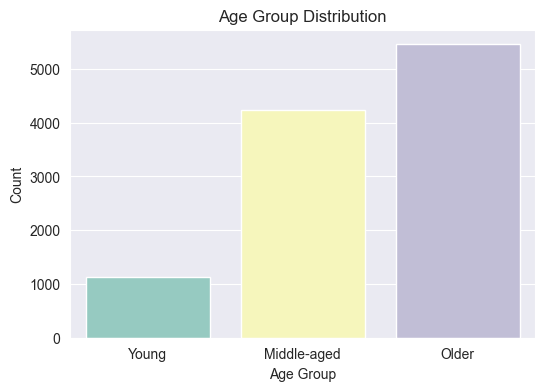

In [14]:
# Check the updated distribution of age groups
age_group_counts = labels_df['age_group'].value_counts()
print("Updated Age Group Distribution:")
display(age_group_counts)

# Plot the distribution of age groups
plt.figure(figsize=(6, 4))
sns.countplot(x='age_group', data=labels_df, hue='age_group', palette='Set3', order=['Young', 'Middle-aged', 'Older'],legend=False)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

## 5. Balanced Sampling Across Demographics and Conditions
We will now create balanced samples of 50 images per demographic group, ensuring similar condition distributions across groups.

### 5.1 Sampling Strategy Overview
Our sampling strategy accounts for the **multi-label nature** of the dataset:

- **Sample Size per Group**: 50 images.
- **Condition**: Focus on the 'drusens' condition.
- **Balancing Condition**: Aim to have similar counts of the 'drusens' condition in every group.
- **Multi-Label Consideration**: Images may have multiple conditions.
- **Remaining Slots**: Fill remaining slots with random samples from the group.

### 5.2 Filter for Adequate Image Quality

We include only images labeled as "Adequate" to maintain data quality.

In [15]:
# Filter only the rows where image quality is "Adequate" and image exists
adequate_quality_df = labels_df[(labels_df['quality'] == 'Adequate')].copy()

# Ensure that all images in adequate_quality_df are available
adequate_quality_df = adequate_quality_df[adequate_quality_df['image_id'].isin(available_image_ids)].reset_index(drop=True)

print(f"Total adequate images available for sampling: {len(adequate_quality_df)}")


Total adequate images available for sampling: 14039


### 5.2 Create Balanced Samples for Age and Sex Experiments

We implement a sampling strategy that ensures each group has:

- **50 images**.
- **Similar counts** for the selected condition, as much as possible given data constraints.
- **Random filling** of remaining slots, which may include images with multiple conditions.

In [16]:
# Focus on 'drusens' condition only
condition_of_interest = 'drusens'

# Define sample size per group
sample_size = 50

# Function to get the minimum available samples of 'drusens' across groups
def get_min_available_samples_across_groups(df, group_column, groups, condition):
    min_count = float('inf')
    for group in groups:
        group_subset = df[df[group_column] == group]
        available_samples = group_subset[group_subset[condition] == 1].shape[0]
        if available_samples < min_count:
            min_count = available_samples
    return min_count

# Calculate desired number of 'drusens' samples per group
desired_drusens_samples_per_group = 25  # Adjusted to match Age Experiment

# Ensure we do not exceed the minimum available samples across groups
min_available_samples_age = get_min_available_samples_across_groups(
    adequate_quality_df, 'age_group', ['Young', 'Middle-aged', 'Older'], condition_of_interest)
desired_drusens_samples_per_group_age = min(desired_drusens_samples_per_group, min_available_samples_age)

min_available_samples_sex = get_min_available_samples_across_groups(
    adequate_quality_df, 'patient_sex', [1, 2], condition_of_interest)
desired_drusens_samples_per_group_sex = min(desired_drusens_samples_per_group, min_available_samples_sex)

# Sampling for Age Experiment
age_groups = ['Young', 'Middle-aged', 'Older']
age_experiment_samples = pd.DataFrame()
for age_group in age_groups:
    group_subset = adequate_quality_df[adequate_quality_df['age_group'] == age_group]
    sampled_group = pd.DataFrame()
    # Sample 'drusens' images
    condition_subset = group_subset[group_subset[condition_of_interest] == 1]
    num_samples = desired_drusens_samples_per_group_age
    if len(condition_subset) >= num_samples:
        sampled_condition = condition_subset.sample(num_samples, random_state=42)
    else:
        # Use all available samples if less than required
        sampled_condition = condition_subset
    sampled_group = pd.concat([sampled_group, sampled_condition])
    # Fill remaining slots with random samples
    total_samples = sampled_group.shape[0]
    remaining_samples = sample_size - total_samples
    if remaining_samples > 0:
        remaining_subset = group_subset.drop(sampled_group.index)
        if len(remaining_subset) >= remaining_samples:
            sampled_group = pd.concat([sampled_group, remaining_subset.sample(remaining_samples, random_state=42)])
        else:
            sampled_group = pd.concat([sampled_group, remaining_subset])
    # Shuffle the sampled group
    sampled_group = sampled_group.sample(frac=1, random_state=42).reset_index(drop=True)
    age_experiment_samples = pd.concat([age_experiment_samples, sampled_group])

age_experiment_samples.reset_index(drop=True, inplace=True)

# Sampling for Sex Experiment
sex_groups = [1, 2]  # 1 = Male, 2 = Female
sex_experiment_samples = pd.DataFrame()
for sex in sex_groups:
    group_subset = adequate_quality_df[adequate_quality_df['patient_sex'] == sex]
    sampled_group = pd.DataFrame()
    # Sample 'drusens' images
    condition_subset = group_subset[group_subset[condition_of_interest] == 1]
    num_samples = desired_drusens_samples_per_group_sex
    if len(condition_subset) >= num_samples:
        sampled_condition = condition_subset.sample(num_samples, random_state=42)
    else:
        # Use all available samples if less than required
        sampled_condition = condition_subset
    sampled_group = pd.concat([sampled_group, sampled_condition])
    # Fill remaining slots with random samples
    total_samples = sampled_group.shape[0]
    remaining_samples = sample_size - total_samples
    if remaining_samples > 0:
        remaining_subset = group_subset.drop(sampled_group.index)
        if len(remaining_subset) >= remaining_samples:
            sampled_group = pd.concat([sampled_group, remaining_subset.sample(remaining_samples, random_state=42)])
        else:
            sampled_group = pd.concat([sampled_group, remaining_subset])
    # Shuffle the sampled group
    sampled_group = sampled_group.sample(frac=1, random_state=42).reset_index(drop=True)
    sex_experiment_samples = pd.concat([sex_experiment_samples, sampled_group])

sex_experiment_samples.reset_index(drop=True, inplace=True)

### 5.3 Verification and Visualization of Final Datasets

In [17]:
# Verify total samples per group in Age Experiment
print("Age Experiment Distribution by Age Group:")
print(age_experiment_samples['age_group'].value_counts())

# Verify 'drusens' condition distribution by Age Group in Age Experiment
print("\n'Drusens' Condition Distribution by Age Group in Age Experiment:")
for age_group in age_groups:
    group_data = age_experiment_samples[age_experiment_samples['age_group'] == age_group]
    drusens_count = group_data[condition_of_interest].sum()
    print(f"{age_group} group has {drusens_count} images with 'drusens' condition")

# Verify total samples per group in Sex Experiment
print("\nSex Experiment Distribution by Sex:")
print(sex_experiment_samples['patient_sex'].value_counts())

# Verify 'drusens' condition distribution by Sex in Sex Experiment
print("\n'Drusens' Condition Distribution by Sex in Sex Experiment:")
for sex in sex_groups:
    group_data = sex_experiment_samples[sex_experiment_samples['patient_sex'] == sex]
    drusens_count = group_data[condition_of_interest].sum()
    sex_str = 'Male' if sex == 1 else 'Female'
    print(f"{sex_str} group has {drusens_count} images with 'drusens' condition")

Age Experiment Distribution by Age Group:
age_group
Young          50
Middle-aged    50
Older          50
Name: count, dtype: int64

'Drusens' Condition Distribution by Age Group in Age Experiment:
Young group has 20 images with 'drusens' condition
Middle-aged group has 25 images with 'drusens' condition
Older group has 27 images with 'drusens' condition

Sex Experiment Distribution by Sex:
patient_sex
1    50
2    50
Name: count, dtype: int64

'Drusens' Condition Distribution by Sex in Sex Experiment:
Male group has 30 images with 'drusens' condition
Female group has 31 images with 'drusens' condition


In [18]:
# Display the first few rows of the balanced age samples
print("Age Experiment Sample:")
display(age_experiment_samples.head())

Age Experiment Sample:


,image_id,patient_id,camera,patient_age,comorbidities,diabetes_time_y,insuline,patient_sex,exam_eye,diabetes,...,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc,other,quality,age_group
0,img10060,5281,Canon CR,23.0,0,NaN,NaN,2,1,no,...,0,0,1,0,0,0,0,0,Adequate,Young
1,img00644,333,Canon CR,13.0,NaN,NaN,NaN,1,2,no,...,0,0,0,0,0,0,0,0,Adequate,Young
2,img11943,6285,Canon CR,25.0,0,NaN,NaN,2,2,no,...,0,0,0,0,0,0,0,0,Adequate,Young
3,img00265,134,Canon CR,29.0,diabetes1,13,yes,2,1,yes,...,0,0,0,0,0,0,0,0,Adequate,Young
4,img03734,1983,Canon CR,29.0,NaN,NaN,NaN,1,1,no,...,0,0,1,0,0,0,0,1,Adequate,Young


In [19]:
# Display the first few rows of the balanced sex samples
print("Sex Experiment Sample:")
display(sex_experiment_samples.head())

Sex Experiment Sample:


,image_id,patient_id,camera,patient_age,comorbidities,diabetes_time_y,insuline,patient_sex,exam_eye,diabetes,...,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc,other,quality,age_group
0,img02977,1574,Canon CR,58.0,0,NaN,NaN,1,2,no,...,0,0,1,0,0,0,0,0,Adequate,Middle-aged
1,img01318,689,NIKON NF5050,NaN,NaN,NaN,NaN,1,2,no,...,0,0,0,0,0,0,0,0,Adequate,NaN
2,img11612,6109,NIKON NF5050,NaN,NaN,NaN,NaN,1,2,no,...,0,0,0,0,0,0,0,0,Adequate,NaN
3,img05284,2786,Canon CR,61.0,diabetes,NaN,NaN,1,2,yes,...,0,0,0,0,0,0,1,0,Adequate,Older
4,img10839,5687,Canon CR,54.0,0,NaN,NaN,1,1,no,...,0,0,1,0,0,0,0,0,Adequate,Middle-aged


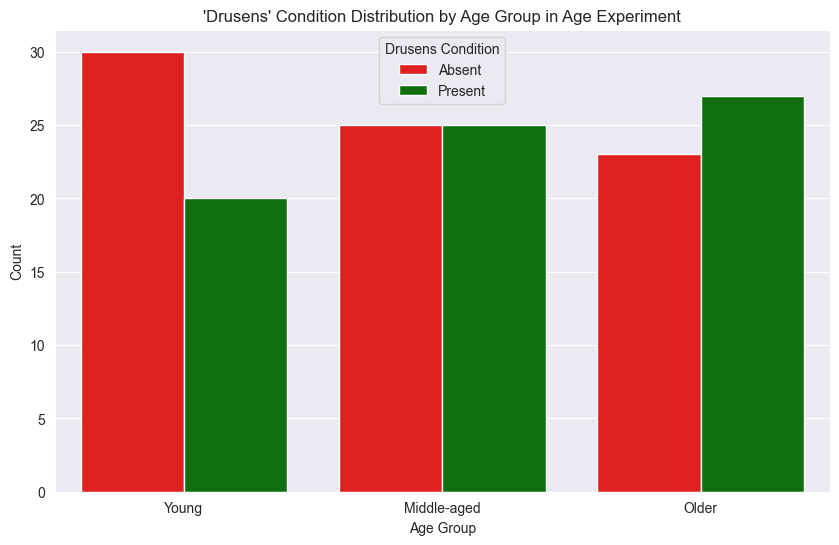

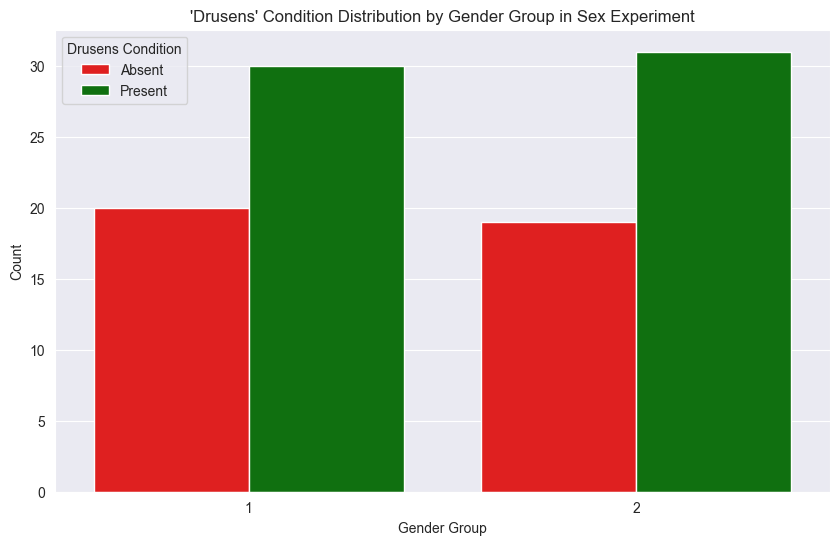

In [20]:
# Define green as "Present" and red as "Absent" for the 'drusens' condition
condition_colors = {0: 'red', 1: 'green'}

# Convert the condition_colors dictionary to a list for use in the color palette
palette = [condition_colors[0], condition_colors[1]]

# Plot 'drusens' condition distribution for each age group in Age Experiment
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=age_experiment_samples, hue='drusens', palette=palette, legend=False)
plt.title("'Drusens' Condition Distribution by Age Group in Age Experiment")
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Drusens Condition', labels=['Absent', 'Present'])
plt.show()


# Plot 'drusens' condition distribution by Gender in Sex Experiment
plt.figure(figsize=(10, 6))
sns.countplot(x='patient_sex', data=sex_experiment_samples, hue='drusens', palette=palette, legend=False)
plt.title("'Drusens' Condition Distribution by Gender Group in Sex Experiment")
plt.xlabel('Gender Group')
plt.ylabel('Count')
plt.legend(title='Drusens Condition', labels=['Absent', 'Present'])
plt.show()


## 7. Saving Sampled Datasets and Images

We will now save the sampled datasets for the two experiments in separate folders and copy the corresponding images into subfolders.

### 7.1 Create Directories and Save Datasets

In [21]:
# Function to save dataset and copy images
def save_dataset_and_images(df, experiment_name):
    # Create directory for the experiment
    os.makedirs(experiment_name, exist_ok=True)
    # Save labels1.csv
    df.to_csv(os.path.join(experiment_name, 'labels1.csv'), index=False)
    # Create images subdirectory
    images_dest = os.path.join(experiment_name, 'images')
    os.makedirs(images_dest, exist_ok=True)
    # Copy images
    for image_id in df['image_id']:
        src_image_path = os.path.join(images_folder, image_id + '.jpg')
        dest_image_path = os.path.join(images_dest, image_id + '.jpg')
        if os.path.exists(src_image_path):
            shutil.copy(src_image_path, dest_image_path)
        else:
            print(f"Image {image_id} not found in source folder.")

# Save datasets and images for Age Experiment
save_dataset_and_images(age_experiment_samples, 'experiment1_ages/dataset')

# Save datasets and images for Sex Experiment
save_dataset_and_images(sex_experiment_samples, 'experiment2_genders/dataset')